# Advanced Debug Challenge - Team Model (HARD MODE 🔥)
## Interactive Activity: Find and Fix ALL the Bugs!

**Difficulty Level: ADVANCED**

This model has **MULTIPLE BUGS** that work together to break training in subtle ways. Some bugs are obvious, others are sneaky!

**Your Task**: 
1. Run all the cells
2. Observe what happens (take notes!)
3. Find ALL the bugs (there are 5)
4. Fix them systematically
5. Explain each bug and its impact

**Hints**: 
- Some bugs are in the math/logic
- Some bugs are in data handling
- Some bugs only appear after several iterations
- The bugs interact with each other!
- Print intermediate values to debug

**Scoring:**
- Find 1-2 bugs: Beginner debugging skills
- Find 3 bugs: Good debugging skills
- Find 4 bugs: Excellent debugging skills  
- Find ALL 5 bugs: Master debugger! 🏆

Good luck - you'll need it! 🐛🔍

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Load Dataset

In [63]:
# Create synthetic binary classification dataset
m_train = 200
m_test = 50
n_features = 20

# Generate data with some structure (not purely random)
np.random.seed(42)

# Training data
X_train = np.random.randn(n_features, m_train)
true_weights = np.random.randn(n_features, 1) * 0.5
y_train_logits = np.dot(true_weights.T, X_train) + 0.5
y_train = (y_train_logits > 0).astype(int)

# Test data
X_test = np.random.randn(n_features, m_test)
y_test_logits = np.dot(true_weights.T, X_test) + 0.5
y_test = (y_test_logits > 0).astype(int)

print(f"Training set: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Test set: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")
print(f"Training labels - 0s: {np.sum(y_train == 0)}, 1s: {np.sum(y_train == 1)}")

Training set: X_train.shape = (20, 200), y_train.shape = (1, 200)
Test set: X_test.shape = (20, 50), y_test.shape = (1, 50)
Training labels - 0s: 82, 1s: 118


## Helper Functions

In [64]:
def sigmoid(z):
    """
    Compute sigmoid activation
    """
    # 🐛 BUG #1: Numerical instability with large values
    # This can cause overflow/underflow issues
       
    z = np.clip(z, -500, 500)   # To prevent overflow, we can clip the input values
    return 1 / (1 + np.exp(-z))



In [65]:
def initialize_parameters(n_features):
    """
    Initialize weights and bias
    """
    # 🐛 BUG #2: Bad initialization - weights too large!
    # This causes gradients to explode
    w = np.random.randn(n_features, 1) * 0.01 # Should be small, not *10!
    b = 0.0
    return w, b

In [66]:
def propagate(w, b, X, y):
    """
    Forward and backward propagation
    """
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # 🐛 BUG #3: Wrong cost calculation!
    # Missing the negative sign in cross-entropy
    # Should be: cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    epsilon=1e-8  # To prevent log(0)=-inf
    A = np.clip(A, epsilon, 1 - epsilon)  # Clip A to prevent log(0)
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    # 🐛 BUG #4: Wrong gradient calculation!
    # Signs are flipped - should be (A - y), not (y - A)
    dw = 1/m * np.dot(X, (A - y).T)  
    db = 1/m * np.sum(A - y)  
    
    grads = {"dw": dw, "db": db}
    return grads, cost

## Training Function

In [67]:
def train(w, b, X, y, num_iterations, learning_rate, print_cost=True):
    """
    Optimize parameters using gradient descent
    """
    costs = []
    
    for i in range(num_iterations):
        # Get gradients and cost
        grads, cost = propagate(w, b, X, y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")
    
    params = {"w": w, "b": b}
    return params, costs

In [68]:
def predict(w, b, X):
    """
    Predict labels for dataset X
    """
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    # 🐛 BUG #5: Wrong prediction threshold and logic!
    # Should be: if A[0, i] > 0.5: y_pred[0, i] = 1
    # But this uses <= instead of >
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:  
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0
    
    return y_pred

## Run the Model

Watch what happens when you run this... 🔥

In [69]:
# Initialize parameters
w, b = initialize_parameters(n_features)

print(f"Initial w stats: mean={np.mean(w):.3f}, std={np.std(w):.3f}, max={np.max(np.abs(w)):.3f}")
print(f"Initial b: {b}")
print()

# Set learning rate
learning_rate = 0.01
num_iterations = 2000

# Train the model
print("Training the model...\n")
try:
    params, costs = train(w, b, X_train, y_train, num_iterations, learning_rate)
    print("\n✅ Training completed!")
except Exception as e:
    print(f"\n❌ Training failed with error: {e}")
    print("\nThis is expected with these bugs. Try to fix them!")
    params = {"w": w, "b": b}
    costs = []

Initial w stats: mean=0.003, std=0.012, max=0.024
Initial b: 0.0

Training the model...

Cost after iteration 0: 0.701585
Cost after iteration 100: 0.575770
Cost after iteration 200: 0.495573
Cost after iteration 300: 0.440496
Cost after iteration 400: 0.400173
Cost after iteration 500: 0.369173
Cost after iteration 600: 0.344440
Cost after iteration 700: 0.324133
Cost after iteration 800: 0.307080
Cost after iteration 900: 0.292496
Cost after iteration 1000: 0.279838
Cost after iteration 1100: 0.268714
Cost after iteration 1200: 0.258836
Cost after iteration 1300: 0.249985
Cost after iteration 1400: 0.241995
Cost after iteration 1500: 0.234733
Cost after iteration 1600: 0.228094
Cost after iteration 1700: 0.221993
Cost after iteration 1800: 0.216360
Cost after iteration 1900: 0.211138

✅ Training completed!


## Visualize Results (if training completed)

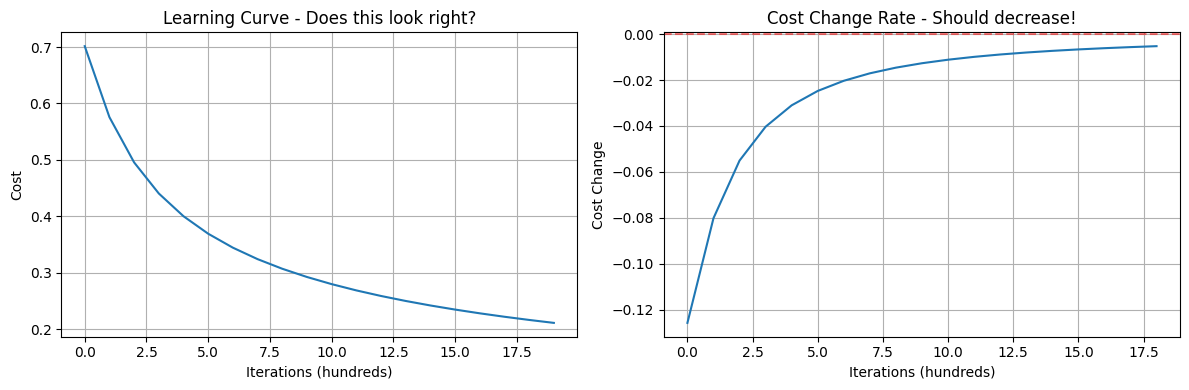


📊 DIAGNOSTICS:
Starting cost: 0.701585
Final cost: 0.211138
Cost change: -0.490447
Cost should DECREASE (be negative). Is it? True

Iterations where cost INCREASED: 0/19
🚨 This should be near 0 for working gradient descent!


In [70]:
if len(costs) > 0:
    # Plot learning curve
    plt.figure(figsize=(12, 4))
    
    # Cost curve
    plt.subplot(1, 2, 1)
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (hundreds)')
    plt.title('Learning Curve - Does this look right?')
    plt.grid(True)
    
    # Cost change rate
    plt.subplot(1, 2, 2)
    if len(costs) > 1:
        cost_changes = np.diff(costs)
        plt.plot(cost_changes)
        plt.ylabel('Cost Change')
        plt.xlabel('Iterations (hundreds)')
        plt.title('Cost Change Rate - Should decrease!')
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print diagnostics
    print("\n📊 DIAGNOSTICS:")
    print(f"Starting cost: {costs[0]:.6f}")
    print(f"Final cost: {costs[-1]:.6f}")
    print(f"Cost change: {costs[-1] - costs[0]:.6f}")
    print(f"Cost should DECREASE (be negative). Is it? {costs[-1] < costs[0]}")
    
    if len(costs) > 1:
        increasing = sum(1 for i in range(len(costs)-1) if costs[i+1] > costs[i])
        print(f"\nIterations where cost INCREASED: {increasing}/{len(costs)-1}")
        print("🚨 This should be near 0 for working gradient descent!")
else:
    print("❌ No costs to plot - training failed immediately!")
    print("Check for errors like division by zero, NaN, or overflow.")

## Evaluate Performance

In [71]:
try:
    # Get predictions
    y_pred_train = predict(params["w"], params["b"], X_train)
    y_pred_test = predict(params["w"], params["b"], X_test)
    
    # Calculate accuracy
    train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100
    
    print(f"Train Accuracy: {train_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    
    # Sanity check
    print("\n🔍 SANITY CHECKS:")
    print(f"Baseline (random guessing): ~50%")
    print(f"Your model: {test_accuracy:.2f}%")
    
    if test_accuracy < 55:
        print("🚨 Model is performing worse than random! Something is seriously wrong.")
    elif test_accuracy < 70:
        print("⚠️ Model is learning but poorly. Some bugs remain.")
    elif test_accuracy < 85:
        print("👍 Model is learning reasonably. Maybe 1-2 bugs left.")
    else:
        print("✅ Model is learning well! Most bugs are fixed.")
    
    # Check prediction distribution
    print(f"\nPrediction distribution:")
    print(f"Training: {np.sum(y_pred_train == 0)} zeros, {np.sum(y_pred_train == 1)} ones")
    print(f"Expected: ~{np.sum(y_train == 0)} zeros, ~{np.sum(y_train == 1)} ones")
    
    if np.sum(y_pred_train == 0) == m_train or np.sum(y_pred_train == 1) == m_train:
        print("🚨 All predictions are the same! Check your prediction function.")
    
except Exception as e:
    print(f"❌ Evaluation failed: {e}")
    print("Fix the bugs and try again!")

Train Accuracy: 98.00%
Test Accuracy: 88.00%

🔍 SANITY CHECKS:
Baseline (random guessing): ~50%
Your model: 88.00%
✅ Model is learning well! Most bugs are fixed.

Prediction distribution:
Training: 80 zeros, 120 ones
Expected: ~82 zeros, ~118 ones


---

## 🎯 DEBUG CHECKLIST

Use this systematic approach to find all bugs:

### 1. Data Validation
- [ ] Check input shapes (X, y)
- [ ] Check for NaN or Inf values
- [ ] Verify labels are 0 or 1
- [ ] Check data is properly normalized

### 2. Initialization
- [ ] Are weights initialized to reasonable values?
- [ ] Is the initialization scale appropriate?
- [ ] Check: print initial w statistics

### 3. Forward Propagation
- [ ] Is the sigmoid function numerically stable?
- [ ] Are matrix dimensions correct?
- [ ] Check: print A statistics (min, max, mean)

### 4. Cost Function
- [ ] Is the cost formula correct?
- [ ] Are all signs correct?
- [ ] Should cost increase or decrease?
- [ ] Check: does cost match expected range?

### 5. Backward Propagation
- [ ] Are gradient formulas correct?
- [ ] Are all signs correct (easy to flip!)?
- [ ] Check: print gradient statistics
- [ ] Verify: gradients should be small numbers

### 6. Gradient Descent
- [ ] Is learning rate appropriate?
- [ ] Are we moving in the right direction?
- [ ] Check: cost should decrease over time

### 7. Prediction
- [ ] Is the threshold correct (0.5)?
- [ ] Is the comparison logic correct (>, <, >=, <=)?
- [ ] Are predictions 0 and 1 (not reversed)?
- [ ] Check: prediction distribution reasonable?

---

## 🔬 DEBUGGING TOOLS

Add these code snippets to investigate:

In [72]:
# Tool 1: Check for NaN or Inf
def check_nan_inf(arr, name):
    has_nan = np.any(np.isnan(arr))
    has_inf = np.any(np.isinf(arr))
    if has_nan or has_inf:
        print(f"⚠️ {name} contains NaN: {has_nan}, Inf: {has_inf}")
    return has_nan or has_inf

# Example usage:
# check_nan_inf(w, "weights")
# check_nan_inf(A, "activations")

In [73]:
# Tool 2: Print detailed statistics
def print_stats(arr, name):
    print(f"\n{name} statistics:")
    print(f"  Shape: {arr.shape}")
    print(f"  Min: {np.min(arr):.6f}")
    print(f"  Max: {np.max(arr):.6f}")
    print(f"  Mean: {np.mean(arr):.6f}")
    print(f"  Std: {np.std(arr):.6f}")
    print(f"  Contains NaN: {np.any(np.isnan(arr))}")
    print(f"  Contains Inf: {np.any(np.isinf(arr))}")

# Example usage:
# print_stats(w, "weights")
# print_stats(grads["dw"], "gradients dw")

In [74]:
# Tool 3: Numerical gradient checking
def check_gradient(w, b, X, y, epsilon=1e-7):
    """
    Check if analytical gradient matches numerical gradient
    """
    # Get analytical gradient
    grads, _ = propagate(w, b, X, y)
    
    # Compute numerical gradient for first weight
    w_plus = w.copy()
    w_plus[0, 0] += epsilon
    _, cost_plus = propagate(w_plus, b, X, y)
    
    w_minus = w.copy()
    w_minus[0, 0] -= epsilon
    _, cost_minus = propagate(w_minus, b, X, y)
    
    numerical_grad = (cost_plus - cost_minus) / (2 * epsilon)
    analytical_grad = grads["dw"][0, 0]
    
    print(f"\nGradient Check:")
    print(f"Numerical gradient: {numerical_grad:.8f}")
    print(f"Analytical gradient: {analytical_grad:.8f}")
    print(f"Difference: {abs(numerical_grad - analytical_grad):.8f}")
    
    if abs(numerical_grad - analytical_grad) < 1e-5:
        print("✅ Gradients match!")
    else:
        print("❌ Gradients don't match - bug in gradient calculation!")

# Example usage:
# w_test, b_test = initialize_parameters(n_features)
# check_gradient(w_test, b_test, X_train[:, :10], y_train[:, :10])

---

## 📝 BUG REPORT TEMPLATE

Document each bug you find:

### Bug #1:
Location: (sigmoid(), 2)

What's wrong: Sigmoid computationally was numerically unstable for large values of z.

Why it's wrong: When z becomes very large or very small, np.exp(-z) can overflow, producing inf which causes NaN values. 

How to fix: By clipping the input values before applying exponential.

Observable symptoms: Runtime warnings, overflow errors, cost becoming NaN during training.


### Bug #2:
Location: initialize_parameters() function

What's wrong: Weights were initialized with very large random values.

Why it's wrong: Large initial weights produce extreme activations leading to unstable gradients leading to poor training.

How to fix: Initialize weights with small values.

Observable symptoms: Exploding cost, unstable training.

---

### Bug #3:
Location: Cost calculation inside propagate().

What's wrong: Negative sign was missing in cross-entropy loss.

Why it's wrong: Without the negative sign, the model maximizes loss instead of minimizing it.

How to fix: By adding negative sign in front of the equation of cost.

cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

Observable symptoms: Cost increases instead of decreasing.

---

### Bug #4:
Location: Gradient computation in propagate().

What's wrong: Gradients used incorrect sign (y - A).

Why it's wrong: Incorrect sign moves parameters in the wrong direction during gradient descent.

How to fix: By changing signs

dw = 1/m * np.dot(X, (A - y).T)
db = 1/m * np.sum(A - y)

Observable symptoms: Model fails to learn, cost behaves incorrectly.

---

### Bug #5:
Location: predict() function.

What's wrong: Prediction threshold logic was incorrect / reversed.

Why it's wrong: Wrong comparison leads to flipped class predictions.

How to fix: by changing sign 

if A[0, i] > 0.5:
    y_pred[0, i] = 1
else:
    y_pred[0, i] = 0

Observable symptoms: Very low accuracy or predictions mostly wrong.

---

## 🏆 SCORING RUBRIC

### Points by Bug Difficulty:
- **Bug #1** (Sigmoid stability): 1 point - Medium difficulty
- **Bug #2** (Initialization): 2 points - Easy to spot
- **Bug #3** (Cost sign): 2 points - Requires understanding math
- **Bug #4** (Gradient signs): 3 points - Hard, requires gradient understanding
- **Bug #5** (Prediction logic): 2 points - Tricky logic error

**Total: 10 points**

### Time Bonuses:
- Find all bugs in <15 min: +5 bonus points
- Find all bugs in <30 min: +3 bonus points
- Find all bugs in <45 min: +1 bonus point

### Team Score:
**Bug Points:** ___/10

**Time Bonus:** ___/5

**Explanation Quality:** ___/5 (instructor scores)

**TOTAL:** ___/20

---

## 💡 HINTS (Use Sparingly!)

<details>
<summary>Hint 1: First thing to check (Click to reveal)</summary>

Look at the initialization function. Are the weights a reasonable scale? Remember gradient descent works best with small initial values.
</details>

<details>
<summary>Hint 2: Cost behavior (Click to reveal)</summary>

If cost is INCREASING instead of decreasing, check:
1. Are you minimizing or maximizing?
2. Are gradient signs correct?
3. Is learning rate too high?
</details>

<details>
<summary>Hint 3: Predictions (Click to reveal)</summary>

If all predictions are the same class, look at:
1. The threshold comparison (>, <, >=, <=)
2. Which class is assigned to which condition
3. Are 0 and 1 swapped somewhere?
</details>

<details>
<summary>Hint 4: Math check (Click to reveal)</summary>

Cross-entropy loss formula:
- Should have a NEGATIVE sign at the front
- Gradients: dw = (1/m) * X * (A - Y).T
- Double check all your signs!
</details>

<details>
<summary>Hint 5: Numerical issues (Click to reveal)</summary>

Sigmoid can overflow when z is very large (positive or negative). Consider clipping z or using a numerically stable sigmoid.
</details>

---

**Good luck debugging! Remember: systematic debugging beats random guessing.** 🎯